In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('..\Datasets\Emotion_final.csv')

### Data Cleaning

In [2]:
import texthero as hero

In [3]:
data['clean_text'] = hero.clean(data['Text'])

### Représentation (modèle de fréquence)

In [4]:
data['tfidf_clean_text'] = hero.tfidf(data['clean_text'])

### Visualizations

In [5]:
data['pca_tfidf_clean_text'] = hero.pca(data['tfidf_clean_text'])

In [6]:
hero.scatterplot(data, col='pca_tfidf_clean_text', color='Emotion', title = 'PCA Emotions')

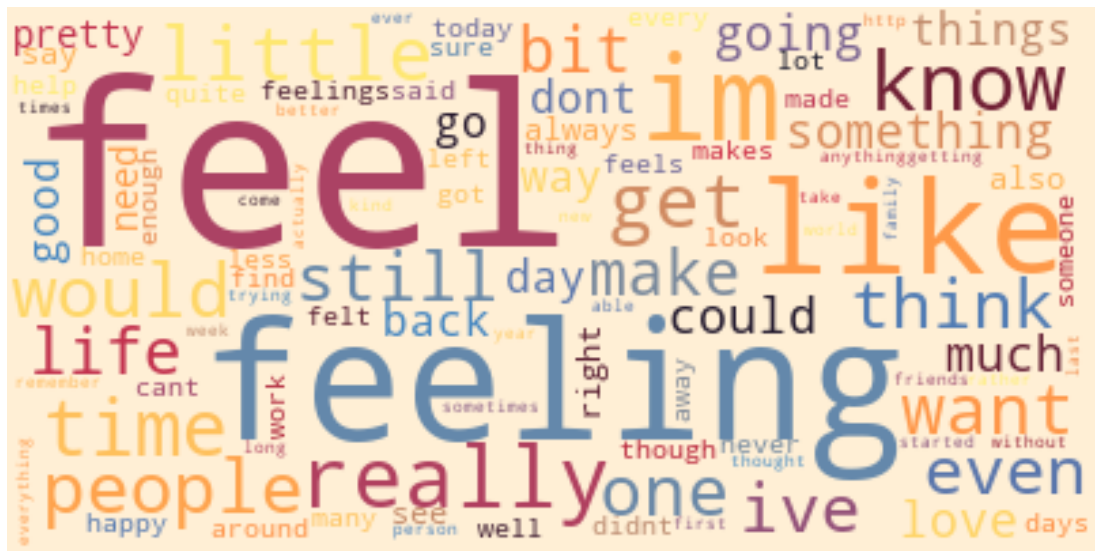

In [7]:
hero.wordcloud(data.clean_text, max_words=100)

In [8]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["subject","com","edu","\\","e","c","x"]))
data['clean_text'] = hero.remove_stopwords(data['clean_text'], custom_stopwords)

In [9]:
NUM_TOP_WORDS = 10
data.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion              
anger     feel           1803
          feeling         923
          like            479
          im              426
          really          171
          get             154
          people          150
          know            149
          time            146
          little          136
fear      feel           1483
          feeling         926
          im              383
          like            323
          little          194
          bit             143
          know            139
          really          129
          anxious         126
          still           119
happy     feel           4948
          feeling        1956
          like           1267
          im             1007
          really          381
          time            370
          know            323
          get             311
          make            276
          people          266
love      feel           1180
          feeling         471
          like    

In [10]:
import fasttext


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data['Emotion'] = data[['Emotion']].apply(lambda x: '__label__' + x)

In [13]:
train, test = train_test_split(data, test_size=0.3)


In [14]:
train

,Text,Emotion,clean_text,tfidf_clean_text,pca_tfidf_clean_text
16347,i feel agitated and annoyed more than worried ...,__label__fear,feel agitated annoyed worried fearful feelings...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.037554205070281635, -0.04421007586255509]"
7344,i feel somewhat remorseful that i wont be arou...,__label__sadness,feel somewhat remorseful wont around move week...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.05235841504972468, 0.037246528877063464]"
20039,A host of splendid 19th century rooms througho...,__label__happy,host splendid 19th century rooms throughout lo...,"[0.0, 0.3419768878713489, 0.0, 0.0, 0.0, 0.0, ...","[-0.014975388115938978, -0.049600709438316855]"
15348,i almost didn t want to post these because i c...,__label__fear,almost want post sometimes feel intimidated am...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.04788668996701008, -0.020605039502985492]"
6315,i want to not feel angry because i haven t the...,__label__anger,want feel angry right feel way,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.14056485059700896, 0.07750458015219426]"
...,...,...,...,...,...
15440,i look back to the pop music from the s my chi...,__label__sadness,look back pop music childhood still feels fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01621168839021733, -0.03874222493730267]"
10157,i can be surrounded by a sea of people and sti...,__label__sadness,surrounded sea people still feel alone,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.06118741157729776, 0.0006202904605256323]"
14396,i m feeling miserable serioulsy,__label__sadness,feeling miserable serioulsy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.11189910571629962, -0.08297211143036189]"
14423,i feel fine i feel more consistent with my del...,__label__happy,feel fine feel consistent delivery throwing st...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.06559462316439588, -0.009345627518505787]"


In [15]:
import csv

train[['Emotion', 'clean_text']].to_csv('train.txt', index=False, sep = ' ', header = None, quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
test[['Emotion', 'clean_text']].to_csv('test.txt', index=False, sep = ' ', header = None, quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [16]:
model = fasttext.train_supervised('train.txt', wordNgrams = 2)

In [17]:
model.test('test.txt')

(6438, 0.8112767940354148, 0.8112767940354148)

In [18]:
model.predict('test.txt')

(('__label__anger',), array([0.65694845]))

In [20]:
f = open('test.txt') 
test=0 
liste_y = [] 
liste_x = [] 
for line in f:     
    if test < 10:         
        v = line.split()         
        liste_y.append(v[0])         
        liste_x.append(" ".join((v[1:])))      # values = line.split()     # word = values[0]     # coefs = np.asarray(values[1:], dtype='float32')     # embeddings_index[word] = coefs 

f.close()

In [21]:
from sklearn.metrics import classification_report
y_pred = [model.predict(phrase)[0] for phrase in liste_x]
print(classification_report(liste_y,y_pred))

                   precision    recall  f1-score   support

   __label__anger       0.73      0.74      0.74       919
    __label__fear       0.75      0.64      0.69       824
   __label__happy       0.84      0.95      0.89      2069
    __label__love       0.74      0.44      0.55       497
 __label__sadness       0.84      0.94      0.89      1851
__label__surprise       0.83      0.29      0.43       278

         accuracy                           0.81      6438
        macro avg       0.79      0.67      0.70      6438
     weighted avg       0.81      0.81      0.80      6438



In [ ]:
cm = metrics.confusion_matrix(Y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,6))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)